# Loan Application Status Prediction
### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [110]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [137]:
# Reading the data in
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [138]:
# Checking for missing values and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [139]:
# checking for the datasets statistics
df.describe().round()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.0,614.0,592.0,600.0,564.0
mean,5403.0,1621.0,146.0,342.0,1.0
std,6109.0,2926.0,86.0,65.0,0.0
min,150.0,0.0,9.0,12.0,0.0
25%,2878.0,0.0,100.0,360.0,1.0
50%,3812.0,1188.0,128.0,360.0,1.0
75%,5795.0,2297.0,168.0,360.0,1.0
max,81000.0,41667.0,700.0,480.0,1.0


In [140]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
# The column Loan_ID is not a feature and hence can be dropped
df.drop(columns = ['Loan_ID'], inplace = True)

In [142]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
from pandas.api.types import is_numeric_dtype

In [144]:
categorical_features = [col for col in df.columns if not is_numeric_dtype(df[col])]

In [145]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [146]:
# Encoding the binary valued categorical columns
df['Gender'] = pd.get_dummies(df['Gender'], drop_first = True)
df['Married'] = pd.get_dummies(df['Married'],drop_first = True)
df['Education'] = pd.get_dummies(df['Education'], drop_first = True)
df['Self_Employed'] = pd.get_dummies(df['Self_Employed'], drop_first = True)

In [147]:
# Encoding the 'Dependents' features
df = pd.concat([df,pd.get_dummies(df['Dependents'], drop_first = True)],axis = 1)
# Dropping the 'Dependents' column since it has been encoded
df.drop('Dependents', axis = 1, inplace = True)

In [148]:
# Encoding the 'Property_Area' features
df = pd.concat([df, pd.get_dummies(df['Property_Area'], drop_first = True)], axis = 1)
# Dropping the 'Property_Area' column as it has been replaced with its encoded values
df.drop('Property_Area', axis = 1, inplace = True)

In [149]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,1,2,3+,Semiurban,Urban
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,Y,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Y,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Y,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Y,0,0,0,0,1


In [150]:
# Imputing missing values
from sklearn.impute import KNNImputer

In [161]:
imputer = KNNImputer(n_neighbors = 5)

In [171]:
df['Credit_History'] = imputer.fit_transform(df[['ApplicantIncome','Credit_History']])[:,1].round()

In [175]:
df['Self_Employed'] = imputer.fit_transform(df[['ApplicantIncome','Self_Employed']])[:,1]

In [180]:
df['LoanAmount'] = imputer.fit_transform(df[['ApplicantIncome','LoanAmount']])[:,1]

In [190]:
df['Loan_Amount_Term'] = imputer.fit_transform(df[['ApplicantIncome', 'Loan_Amount_Term']])[:,1]

 All the missing values have been filled with the KNNImputer as the mean, median or mode cannot be used
 since the nature of the features are categorical 

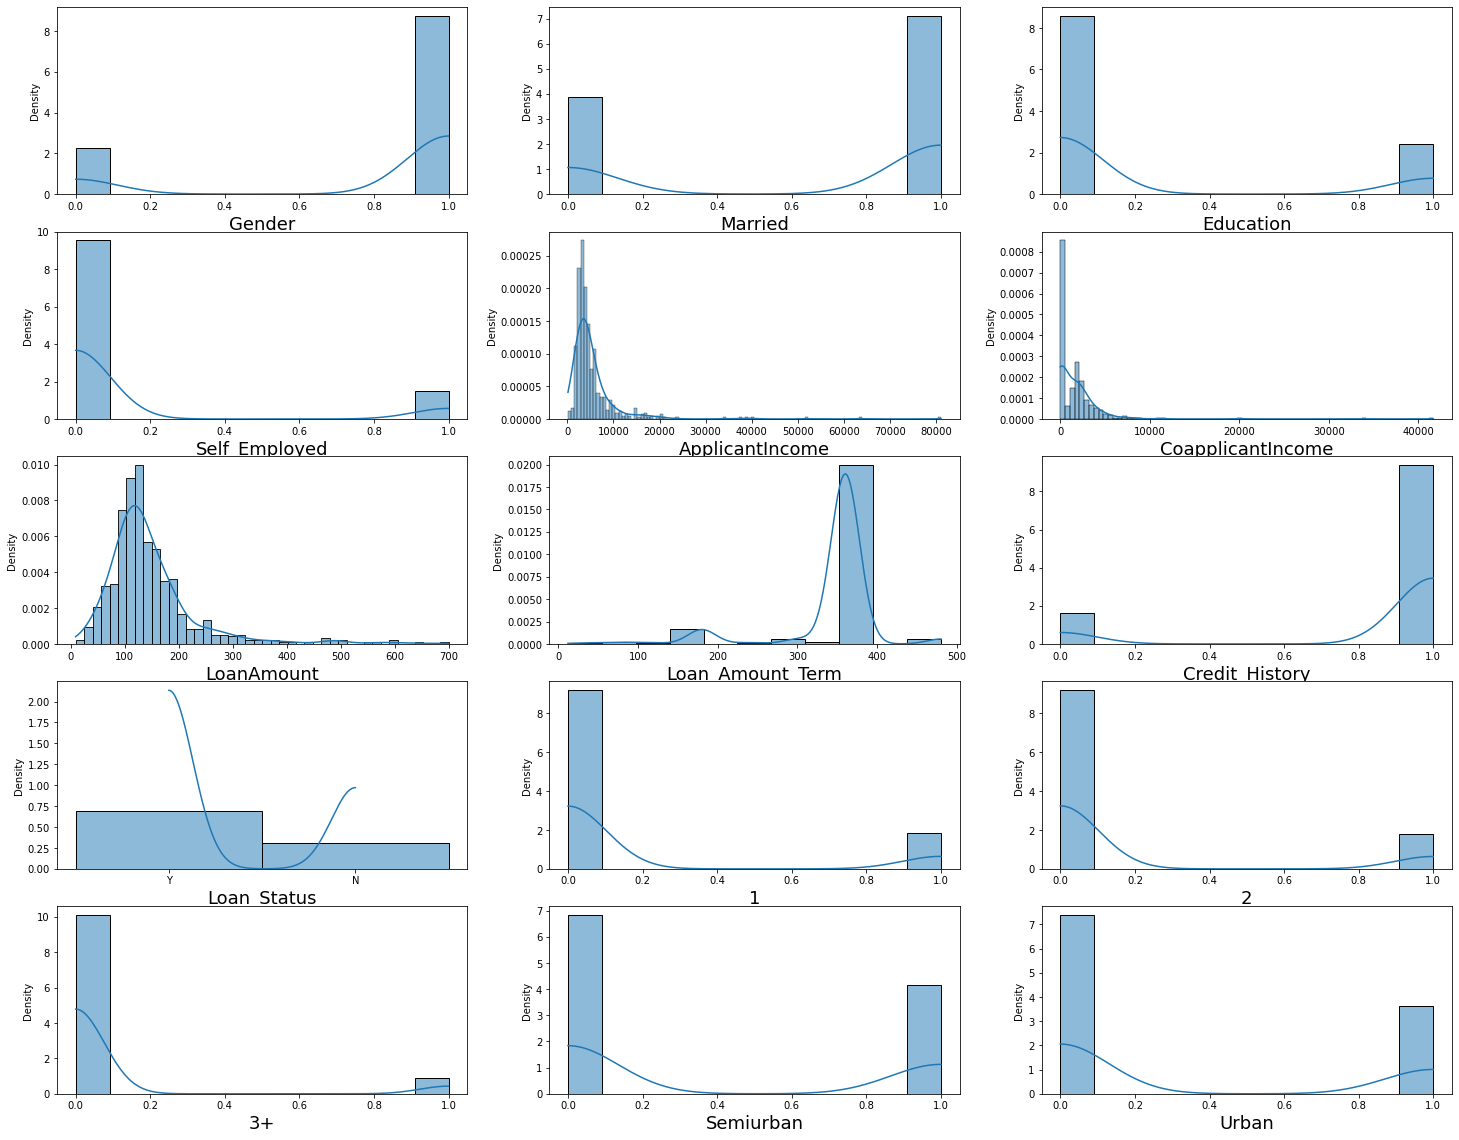

In [194]:
# checking the distribution of the data
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if(plotnumber < 16):
        plt.subplot(5,3,plotnumber)
        sns.histplot(df[col], stat = 'density', kde = True)
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

<font color = red>ApplicantIncome, CoApplicantIncome, LoanAmount are contiuous features that have their distribution slightly skewed. all other features are discrete. The target variable LoanStatus is the showing a slightly imbalanced dataset, which we should investigate further later</font>

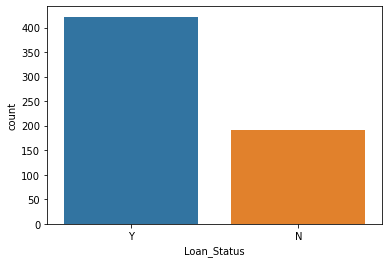

In [196]:
# Visualizing the LoanStatus for the distribution of the two classes in the dataset
sns.countplot(df['Loan_Status'])
plt.show()

In [205]:
print(f"No  : {df['Loan_Status'].value_counts()[1]/len(df)*100:0.3f}%")
print(f"Yes : {df['Loan_Status'].value_counts()[0]/len(df)*100:0.3f}%")

No  : 31.270%
Yes : 68.730%


<font color = red>The classes are slightly imbalanced and will be rebalanced at the end of the EDA and preprocessing step </font>

In [221]:
# Checking for the collinearity using phik between the features and the target variable
import phik

In [223]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [243]:
temp = pd.DataFrame()
feature= []
pvalue = []
score  = []

for col in x.columns:
    if (is_numeric_dtype(df[col])):
        score.append(phik.phik_from_array(df[col],y, [col]))
        pvalue.append(phik.significance.significance_from_array(df[col], y, [col])[0])
        feature.append(col)
    else:
        score.append(phik.phik_from_array(df[col],y))
        pvalue.append(phik.significance.significance_from_array(df[col],y))
        feature.append(col)

In [244]:
temp['feature'] = feature
temp['pvalue']  = pvalue
temp['score']   = score

In [245]:
temp.set_index('feature', inplace = True)

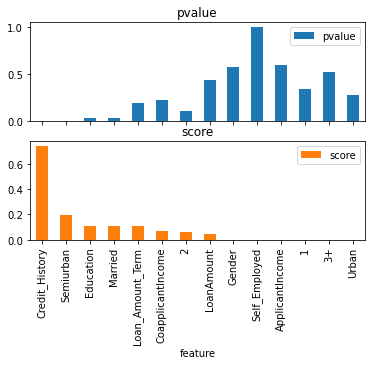

In [250]:
temp.sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

The folllowing features show the lowest correlation score with the target variable 
   * Gender
   * Self_Employed
   * ApplicantIncome
   * 1 : Having 1 Dependent in the family
   * 3+: Having 3 or more dependents in the family
   * Urban


First we will check with a heatmap if there is a correlation between any the aforementioned features and any of the other features

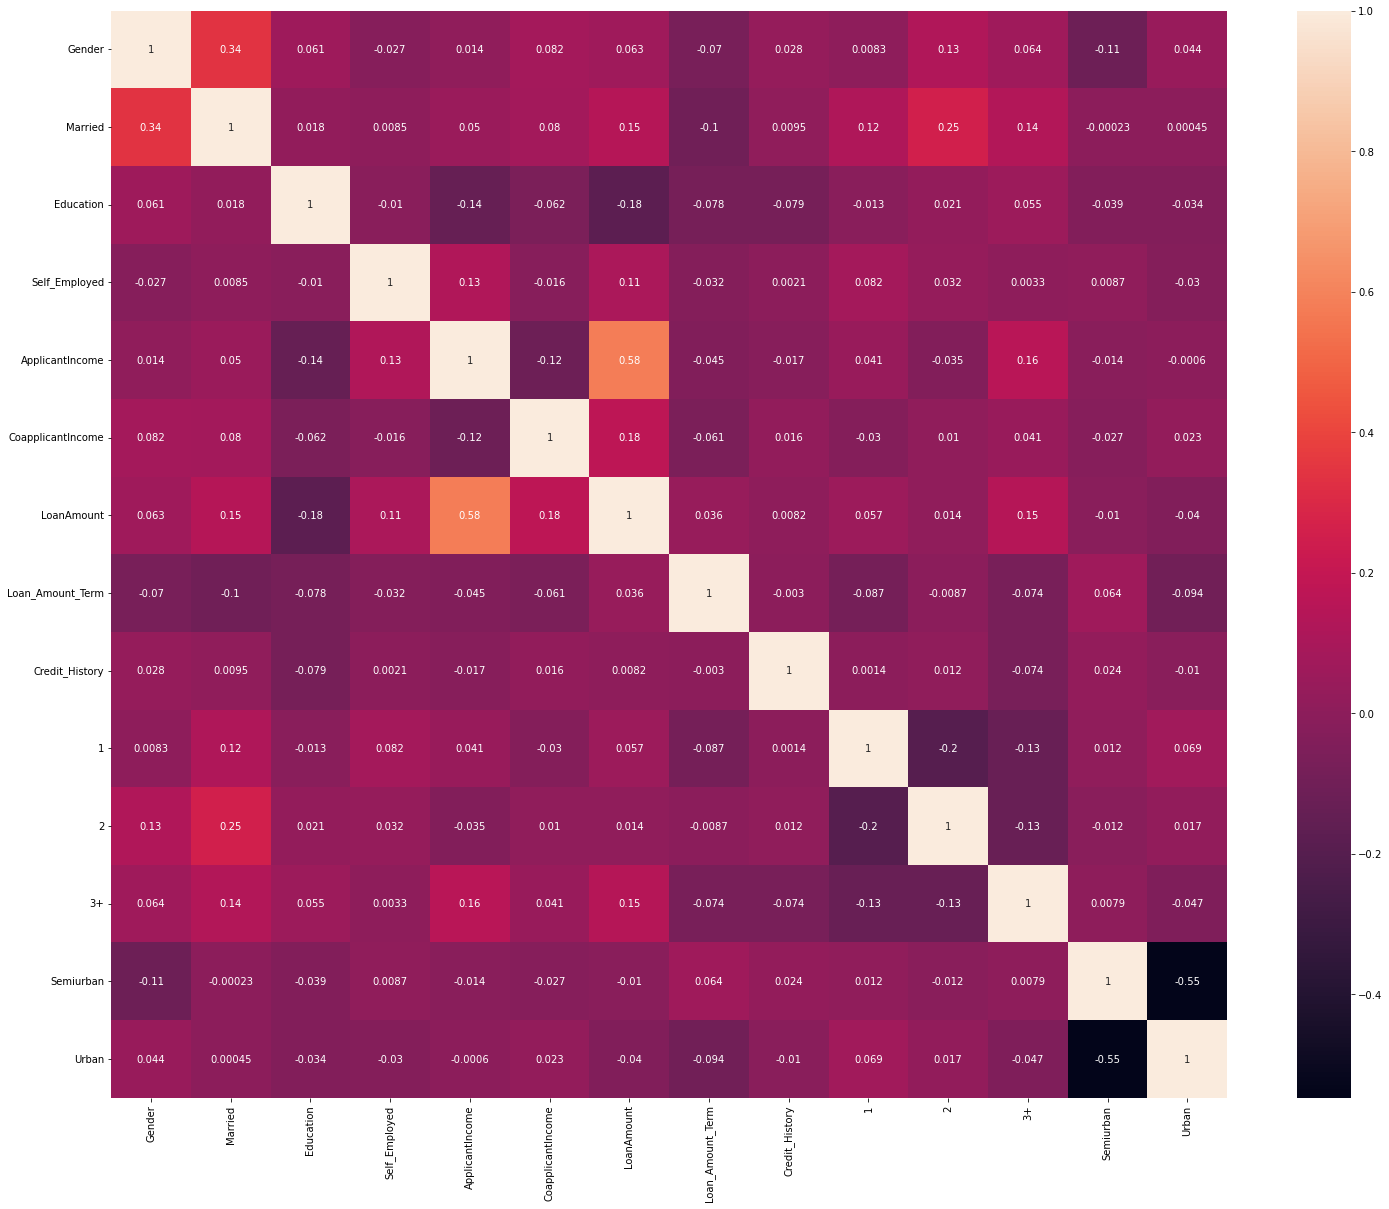

In [257]:
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), annot = True)

plt.show()

<font color = red>
The features ApplicantIncome and LoanAmount tend to share some correlation, this would make sense since the based on the income the applicant earns would a proportional value of loan be given. However, the ApplicantIncome shows an extremely low correlation coefficient score and a very high significance value. Hence we can discard the ApplicantIncome altogether. Similarly the features urban and semi-urban inversely correlate with each other. Urban population are shown do have a non-existent correlation with the Loan_Status, probably because Urban populations would correlate with financially stable households and businesses which wouldn't depend on a Loan where as the opposite is true of the semi-urban areas. 

     -- hence we can keep the pointers in mind when we are planning to discard any features 
</font>